# Logistic Regression

### What is Logistic Regression?


- Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.


- The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.


- The following is an example of a logistic function we can use to find the probability of a vehicle breaking down, depending on how many years it has been since it was serviced last.

![example](../data/years.JPG)

- Here is how you can interpret the results from the graph to decide whether the vehicle will break down or not.

![example](../data/years-2.JPG)

### Advantages of the Logistic Regression Algorithm

- Logistic regression performs better when the data is linearly separable

-    It does not require too many computational resources as it’s highly interpretable

-    There is no problem scaling the input features—It does not require tuning

-    It is easy to implement and train a model using logistic regression

-    It gives a measure of how relevant a predictor (coefficient size) is, and its direction of association (positive or negative)


### How Does the Logistic Regression Algorithm Work?

- Consider the following example: An organization wants to determine an employee’s salary increase based on their performance.


- For this purpose, a linear regression algorithm will help them decide. Plotting a regression line by considering the employee’s performance as the independent variable, and the salary increase as the dependent variable will make their task easier.

![example](../data/salary-hike.JPG)


- Now, what if the organization wants to know whether an employee would get a promotion or not based on their performance? The above linear graph won’t be suitable in this case. As such, we clip the line at zero and one, and convert it into a sigmoid curve (S curve).


![example](../data/employee-rating.JPG)


- Based on the threshold values, the organization can decide whether an employee will get a salary increase or not.

## Example using LogisticRegression from sklean

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

The input and output should be NumPy arrays (instances of the class numpy.ndarray) or similar objects. numpy.arange() creates an array of consecutive, equally-spaced values within a given range. For more information on this function, check the official documentation or NumPy arange(): How to Use np.arange().

The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column. For more information on .reshape(), you can check out the official documentation. Here’s how x and y look now:

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
model = LogisticRegression(solver='liblinear', random_state=0, tol=0.1)

The above statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:

- penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

- dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).


- tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.


- C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.


- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).


- intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.


- class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.


- random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.


- solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.


- max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.


- multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.


- verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.


- warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.


- n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.


- l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

You should carefully match the solver and regularization method for several reasons:


- 'liblinear' solver doesn’t work without regularization.

- 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.

- 'saga' is the only solver that supports elastic-net regularization.

In [4]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear', tol=0.1)

You can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:

In [5]:
model.classes_

array([0, 1])

This is the example of binary classification, and y can be 0 or 1, as indicated above.

You can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 like so:

In [6]:
model.intercept_

array([-1.0294685])

In [7]:
model.coef_

array([[0.49915757]])

As you can see, 𝑏₀ is given inside a one-dimensional array, while 𝑏₁ is inside a two-dimensional array. You use the attributes .intercept_ and .coef_ to get these results.

#### `predict_proba()` method

`predict_proba` method gives the probabilities for the target variable(0 and 1) in this case, in array form.

In [8]:
model.predict_proba(x)

array([[0.73681284, 0.26318716],
       [0.62955563, 0.37044437],
       [0.50778771, 0.49221229],
       [0.38508873, 0.61491127],
       [0.27544658, 0.72455342],
       [0.1875027 , 0.8124973 ],
       [0.12287554, 0.87712446],
       [0.07837492, 0.92162508],
       [0.04908869, 0.95091131],
       [0.03038501, 0.96961499]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

**`prepict()` method**

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
model.score(x, y)

0.9

### Check predictions:

There are four ways to check if the predictions are right or wrong:

-    TN / True Negative: the case was negative and predicted negative
-    TP / True Positive: the case was positive and predicted positive
-    FN / False Negative: the case was positive but predicted negative
-    FP / False Positive: the case was negative but predicted positive

**Precision — What percent of your predictions were correct?**

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall — What percent of the positive cases did you catch?**

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

**F1 score — What percent of positive predictions were correct?**

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [11]:
cf_matrix = confusion_matrix(y, model.predict(x))

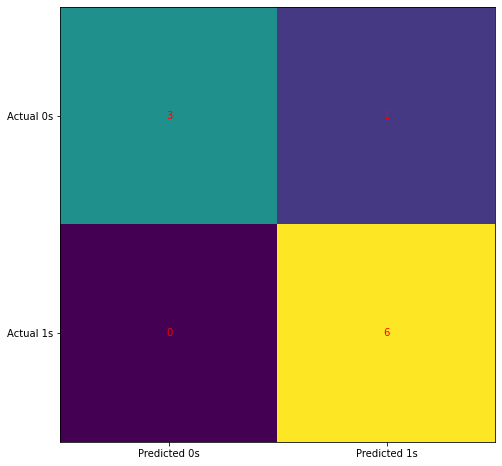

In [12]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

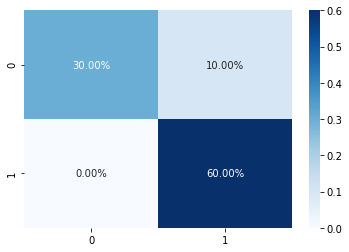

In [13]:
import seaborn as sns

plot = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                    fmt='.2%', cmap='Blues')

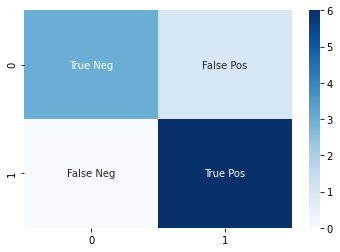

In [14]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

The obtained matrix shows the following:

- Three true negative predictions: The first three observations are zeros predicted correctly.
- No false negative predictions: These are no ones wrongly predicted as zeros.
- One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
- Six true positive predictions: The last six observations are ones predicted correctly.

In [15]:
print(classification_report(y, model.predict(x), zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [16]:
from sklearn.metrics import f1_score
f1_score(y, model.predict(x))

0.923076923076923

In [17]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [18]:
model.intercept_

array([-3.51335372])

In [19]:
model.coef_

array([[1.12066084]])

In [20]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [21]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [22]:
model.score(x, y)

1.0

In [23]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

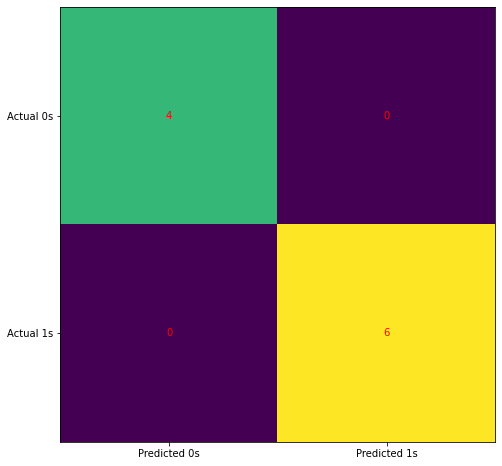

In [24]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [26]:
from sklearn.metrics import f1_score
f1_score(y, model.predict(x), zero_division=1)

1.0

For more advanced examples see [LogisticRegression-support](../supports/LogisticRegression.ipynb)